In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## 0. Assumptions
- Treatment Variable(D): 1 if share_virtual + share_hybrit >= 50 %, 0 for else.
- Online Months: Aggregation(sum) of the treatment variable D grouped by (State, ID, Name), length of online learning periods.
- Treatment Group(T): If online Months >= 1, 0 for else.
- Delta Score: Difference of student score on 2022 and 2019.
- Evaluation: OSL model representing how far student performance is from the average(in SE unit scale).
- Subcat: Subcategory, -> referring to the subject wither math or rla(comprehension).
- Subgroup(race): Another subcategory, but we ignored it.

## 1. Average Treatment Effect

In [5]:
# load datasets
math_df = pd.read_csv('math_seda.csv')
display(math_df.head(10))

rla_df = pd.read_csv('rla_seda.csv')
display(rla_df.head(10))

,Online_months,stateabb,sedaadmin,sedaadminname,ys_mn19_ol,ys_mn19_ol_se,ys_mn19_eb,ys_mn19_eb_se,ys_mn22_ol,ys_mn22_ol_se,...,ys_chg_ol,ys_chg_ol_se,ys_chg_eb,ys_chg_eb_se,tot_asmt19,tot_asmt22,cell19,cell22,avg_asmt19,avg_asmt22
0,0,AL,100005,ALBERTVILLE CITY,-0.350,0.048583,-0.376,0.0440,-0.5400,0.048953,...,-0.190000,0.068967,-0.14100,0.0578,2594,2740,6,6,432.3,456.7
1,0,AL,100006,MARSHALL COUNTY,-0.461,0.049051,-0.464,0.0444,-0.5010,0.049806,...,-0.040200,0.069888,-0.03280,0.0584,2560,2555,6,6,426.7,425.8
2,8,AL,100007,HOOVER CITY,0.295,0.048194,0.289,0.0437,0.4050,0.048188,...,0.109000,0.068135,0.11200,0.0573,6417,6259,6,6,1069.5,1043.2
3,0,AL,100008,MADISON CITY,0.469,0.049193,0.428,0.0444,0.4060,0.048580,...,-0.063000,0.069122,-0.00144,0.0579,5019,5296,6,6,836.5,882.7
4,0,AL,100011,LEEDS CITY,-0.378,0.055625,-0.388,0.0492,-0.4310,0.055972,...,-0.053000,0.078858,-0.03460,0.0633,945,944,6,6,157.5,157.3
5,0,AL,100012,BOAZ CITY,-0.422,0.054284,-0.367,0.0483,-0.0942,0.054668,...,0.327000,0.077042,0.22500,0.0623,1098,1085,6,6,183.0,180.8
6,8,AL,100013,TRUSSVILLE CITY,0.355,0.050378,0.320,0.0453,0.3550,0.049841,...,-0.000402,0.070824,0.04840,0.0589,2196,2292,6,6,366.0,382.0
7,4,AL,100030,ALEXANDER CITY,-0.377,0.051417,-0.369,0.0462,-0.3440,0.052995,...,0.032800,0.073836,0.01880,0.0606,1391,1366,6,6,231.8,227.7
8,0,AL,100060,ANDALUSIA CITY,-0.342,0.058015,-0.273,0.0510,0.0364,0.059564,...,0.378000,0.083152,0.24400,0.0655,819,807,6,6,136.5,134.5
9,2,AL,100090,ANNISTON CITY,-0.874,0.056432,-0.873,0.0500,-0.9880,0.060256,...,-0.114000,0.082535,-0.10400,0.0651,786,835,6,6,131.0,139.2


,Online_months,stateabb,sedaadmin,sedaadminname,ys_mn19_ol,ys_mn19_ol_se,ys_mn19_eb,ys_mn19_eb_se,ys_mn22_ol,ys_mn22_ol_se,...,ys_chg_ol,ys_chg_ol_se,ys_chg_eb,ys_chg_eb_se,tot_asmt19,tot_asmt22,cell19,cell22,avg_asmt19,avg_asmt22
0,0,AL,100005,ALBERTVILLE CITY,-0.377,0.033052,-0.388,0.0307,-0.465,0.032436,...,-0.08760,0.046314,-0.06590,0.0403,2552,2737,6,6,425.3,456.2
1,0,AL,100006,MARSHALL COUNTY,-0.448,0.032629,-0.444,0.0304,-0.425,0.033305,...,0.02260,0.046591,0.01710,0.0405,2546,2557,6,6,424.3,426.2
2,8,AL,100007,HOOVER CITY,0.293,0.029366,0.298,0.0277,0.416,0.030037,...,0.12300,0.041956,0.10900,0.0373,6384,6256,6,6,1064.0,1042.7
3,0,AL,100008,MADISON CITY,0.568,0.031340,0.548,0.0294,0.486,0.030854,...,-0.08210,0.043901,-0.05050,0.0386,4983,5293,6,6,830.5,882.2
4,0,AL,100011,LEEDS CITY,-0.306,0.045319,-0.305,0.0403,-0.298,0.044387,...,0.00787,0.063427,0.00708,0.0501,945,946,6,6,157.5,157.7
5,0,AL,100012,BOAZ CITY,-0.334,0.042851,-0.312,0.0384,-0.206,0.041569,...,0.12900,0.059699,0.08670,0.0482,1095,1082,6,6,182.5,180.3
6,8,AL,100013,TRUSSVILLE CITY,0.427,0.033704,0.421,0.0313,0.454,0.033833,...,0.02740,0.047666,0.03200,0.0411,2195,2290,6,6,365.8,381.7
7,4,AL,100030,ALEXANDER CITY,-0.381,0.038274,-0.381,0.0350,-0.378,0.038482,...,0.00355,0.054269,0.00415,0.0452,1393,1366,6,6,232.2,227.7
8,0,AL,100060,ANDALUSIA CITY,-0.162,0.048934,-0.157,0.0428,-0.123,0.046309,...,0.03880,0.067373,0.02780,0.0519,818,804,6,6,136.3,134.0
9,2,AL,100090,ANNISTON CITY,-0.736,0.047281,-0.729,0.0416,-0.764,0.046137,...,-0.02840,0.065954,-0.02860,0.0513,786,834,6,6,131.0,139.0


In [6]:
# Use only ys_mn22_ol - ys_mn19_ol as the evaluation metric
# Recompute treatment and delta_score for freshness
math_df["T"] = (math_df["Online_months"] >= 1).astype(int)
math_df["delta_score"] = math_df["ys_mn22_ol"] - math_df["ys_mn19_ol"]

# Calculate ATE, ATT, ATU for this metric
ey_t1_math = math_df[math_df["T"] == 1]["delta_score"].mean()
ey_t0_math = math_df[math_df["T"] == 0]["delta_score"].mean()
ate_math = ey_t1_math - ey_t0_math

print(f'ATE: {ate_math*100:.3f}[%]')

ATE: -6.033[%]


In [7]:
# The group which switched to the online formats tend to decrease student math test score by 6%.
# compred with the group stayed in trditional in person format.

In [9]:
# Recalculate treatment (T) and outcome (delta_score) for RLA data
rla_df["T"] = (rla_df["Online_months"] >= 1).astype(int)
rla_df["delta_score"] = rla_df["ys_mn22_ol"] - rla_df["ys_mn19_ol"]

# Calculate ATE, ATT, ATU for RLA data
ey_t1_rla = rla_df[rla_df["T"] == 1]["delta_score"].mean()
ey_t0_rla = rla_df[rla_df["T"] == 0]["delta_score"].mean()
ate_rla = ey_t1_rla - ey_t0_rla

print(f'ATE: {ate_rla*100:.3f}[%]')

ATE: -5.847[%]


In [14]:
# The group which switched to the online formats tend to decrease student comprehension test score by 5.8%.
# compred with the group stayed in trditional in person format.

## 2. Difference in Difference

treated_pre
treated_post
control_pre
control_post

In [35]:
math_df["treated_pre"] = math_df[math_df["T"] == 1]["ys_mn19_ol"].mean()
math_df["treated_post"] = math_df[math_df["T"] == 1]["ys_mn22_ol"].mean()
math_df["control_pre"] = math_df[math_df["T"] == 0]["ys_mn19_ol"].mean()
math_df["control_post"] = math_df[math_df["T"] == 0]["ys_mn22_ol"].mean()

In [37]:
DiD_math = (
    (math_df["treated_post"] - math_df["treated_pre"]) - (math_df["control_post"] - math_df["control_pre"])
).mean()
print(f'{DiD_math*100:.3f}')

-6.033


In [39]:
rla_df["treated_pre"] = rla_df[rla_df["T"] == 1]["ys_mn19_ol"].mean()
rla_df["treated_post"] = rla_df[rla_df["T"] == 1]["ys_mn22_ol"].mean()
rla_df["control_pre"] = rla_df[rla_df["T"] == 0]["ys_mn19_ol"].mean()
rla_df["control_post"] = rla_df[rla_df["T"] == 0]["ys_mn22_ol"].mean()

In [43]:
DiD_rla = (
    (rla_df["treated_post"] - rla_df["treated_pre"]) - (rla_df["control_post"] - rla_df["control_pre"])
).mean()
print(f'{DiD_rla*100:.3f}')

-5.847


In [44]:
# Prepare math_df for DiD modeling
math_df_did = math_df[["T", "ys_mn19_ol", "ys_mn22_ol"]].copy()

# Reshape into long format
math_long = pd.melt(
    math_df_did.reset_index(),
    id_vars=["index", "T"],
    value_vars=["ys_mn19_ol", "ys_mn22_ol"],
    var_name="Year",
    value_name="Score"
)

# Create Post dummy (0 for 2019, 1 for 2022)
math_long["Post"] = math_long["Year"].apply(lambda x: 1 if "22" in x else 0)

# Interaction term: T * Post
math_long["Treated_Post"] = math_long["T"] * math_long["Post"]

# Run DiD regression for math
did_math = smf.ols("Score ~ T + Post + Treated_Post", data=math_long).fit()

# Prepare rla_df for DiD modeling
rla_df_did = rla_df[["T", "ys_mn19_ol", "ys_mn22_ol"]].copy()

# Reshape into long format
rla_long = pd.melt(
    rla_df_did.reset_index(),
    id_vars=["index", "T"],
    value_vars=["ys_mn19_ol", "ys_mn22_ol"],
    var_name="Year",
    value_name="Score"
)

# Create Post dummy (0 for 2019, 1 for 2022)
rla_long["Post"] = rla_long["Year"].apply(lambda x: 1 if "22" in x else 0)

# Interaction term: T * Post
rla_long["Treated_Post"] = rla_long["T"] * rla_long["Post"]

# Run DiD regression for rla
did_rla = smf.ols("Score ~ T + Post + Treated_Post", data=rla_long).fit()

# Collect coefficients
did_results = pd.DataFrame({
    "Subject": ["Math", "RLA"],
    "DiD_Estimate": [did_math.params["Treated_Post"], did_rla.params["Treated_Post"]],
    "DiD_Estimate[%]": [round(did_math.params["Treated_Post"]*100, 3), round(did_rla.params["Treated_Post"]*100, 3)]
})

did_results

,Subject,DiD_Estimate,DiD_Estimate[%]
0,Math,-0.060334,-6.033
1,RLA,-0.058472,-5.847


## 3. Synthetic Control with California

In [52]:
# math_df: SCM

# Actural score for CA
ca_data = math_df[math_df["stateabb"] == "CA"]
ca_actual = [
    ca_data["ys_mn19_ol"].mean(),
    ca_data["ys_mn22_ol"].mean(),
]

# Synth CA with the rest of states
donor_data = math_df[math_df["stateabb"] != "CA"]
synth_avg = [
    donor_data["ys_mn19_ol"].mean(),
    donor_data["ys_mn22_ol"].mean(),
]

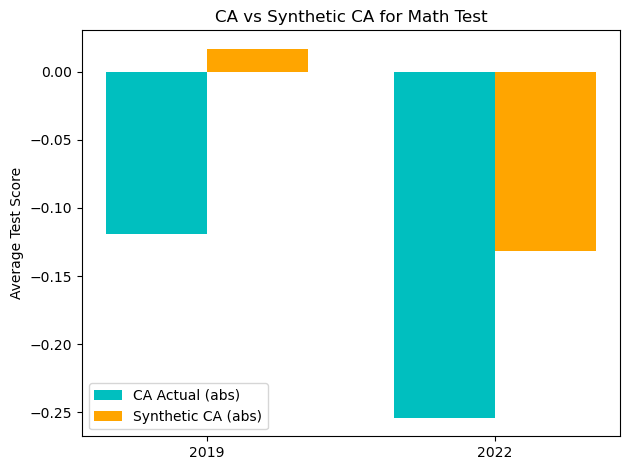

In [54]:
# labeling and value matching
years = [2019, 2022]
ca_actual_abs = [val for val in ca_actual]
synth_avg_abs = [val for val in synth_avg]

# draw graph
x = np.arange(len(years))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, ca_actual_abs, width, label='CA Actual (abs)', color='c')
ax.bar(x + width/2, synth_avg_abs, width, label='Synthetic CA (abs)', color='orange')

ax.set_ylabel('Average Test Score')
ax.set_title('CA vs Synthetic CA for Math Test')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
plt.tight_layout()
plt.show()

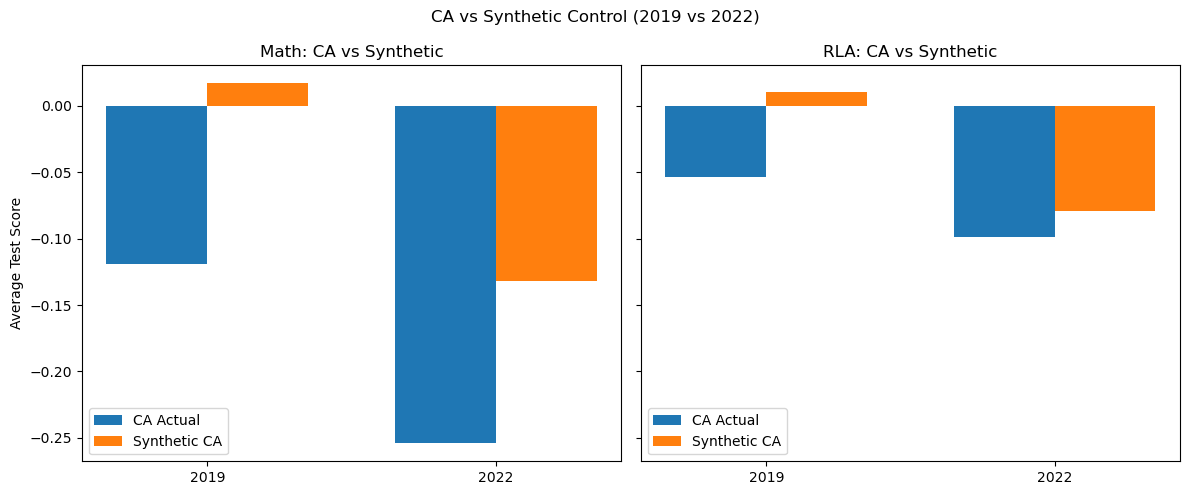

In [56]:
# Extract California actual scores and synthetic average scores for both subjects
def get_scores(df, state_col="stateabb", score_col_2019="ys_mn19_ol", score_col_2022="ys_mn22_ol", treated_state="CA"):
    ca_actual = df[df[state_col] == treated_state][[score_col_2019, score_col_2022]].mean().tolist()
    synth_df = df[df[state_col] != treated_state]
    synth_avg = synth_df[[score_col_2019, score_col_2022]].mean().tolist()
    return ca_actual, synth_avg

# Calculate scores
ca_actual_math, synth_avg_math = get_scores(math_df)
ca_actual_rla, synth_avg_rla = get_scores(rla_df)

# Visualization
years = ['2019', '2022']
x = range(len(years))
width = 0.35

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Math
axs[0].bar([i - width/2 for i in x], ca_actual_math, width, label='CA Actual')
axs[0].bar([i + width/2 for i in x], synth_avg_math, width, label='Synthetic CA')
axs[0].set_title('Math: CA vs Synthetic')
axs[0].set_xticks(x)
axs[0].set_xticklabels(years)
axs[0].set_ylabel('Average Test Score')
axs[0].legend()

# RLA
axs[1].bar([i - width/2 for i in x], ca_actual_rla, width, label='CA Actual')
axs[1].bar([i + width/2 for i in x], synth_avg_rla, width, label='Synthetic CA')
axs[1].set_title('RLA: CA vs Synthetic')
axs[1].set_xticks(x)
axs[1].set_xticklabels(years)
axs[1].legend()

plt.suptitle("CA vs Synthetic Control (2019 vs 2022)")
plt.tight_layout()
plt.show()

In [65]:
# calculate the avg score of MATH for each treatmented state
state_avg_scores = math_df.groupby("stateabb")[["ys_mn19_ol", "ys_mn22_ol"]].mean().reset_index()

all_states = state_avg_scores["stateabb"].tolist()
differences = []

for state in all_states:
    treated_row = state_avg_scores[state_avg_scores["stateabb"] == state].iloc[0]
    treated_2019 = treated_row["ys_mn19_ol"]
    treated_2022 = treated_row["ys_mn22_ol"]

    donor_pool = state_avg_scores[state_avg_scores["stateabb"] != state].copy()
    donor_pool["distance"] = (donor_pool["ys_mn19_ol"] - treated_2019).abs()

    top_donors = donor_pool.nsmallest(3, "distance")
    synth_2022 = top_donors["ys_mn22_ol"].mean()

    effect = treated_2022 - synth_2022
    differences.append({"State": state, "Treatment_Effect": effect})

# Dataframe
synth_effects_df = pd.DataFrame(differences).sort_values("Treatment_Effect")
display(synth_effects_df.head(10))

,State,Treatment_Effect
15,ND,-0.139770
17,OR,-0.133166
23,WV,-0.121197
16,NH,-0.093124
13,MS,-0.091493
12,MN,-0.074487
4,CT,-0.050414
7,KS,-0.036137
14,NC,-0.033299
8,KY,-0.031707


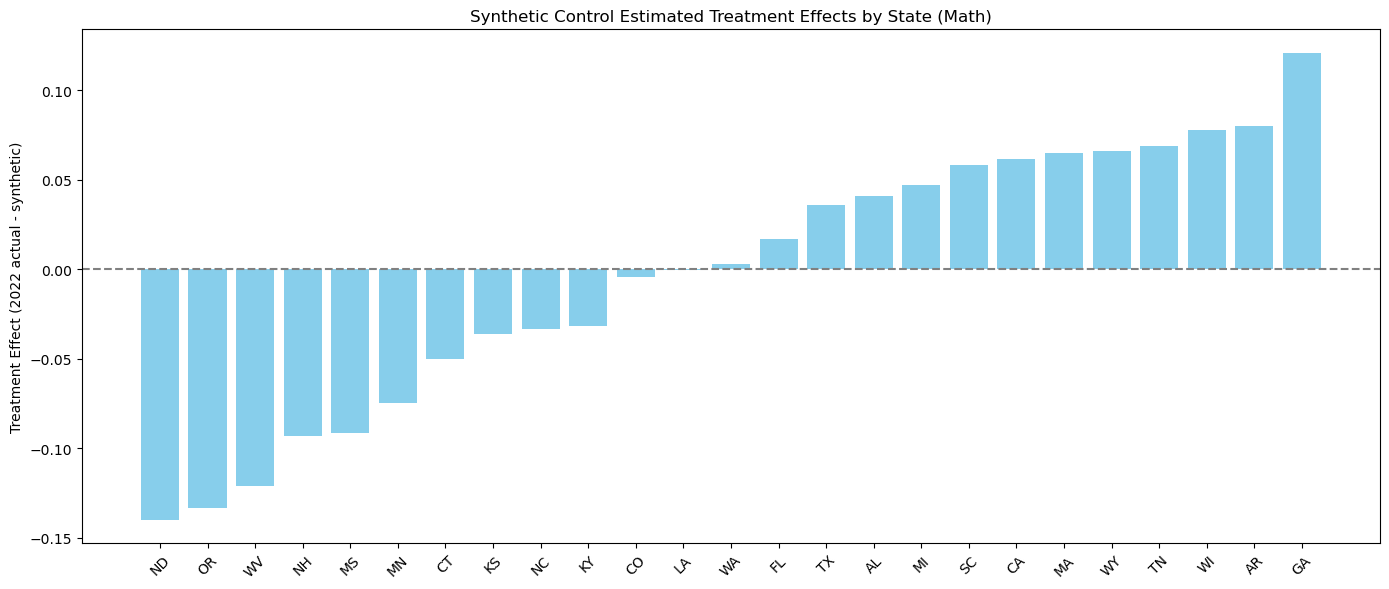

In [63]:
# Sort and plot the result
plt.figure(figsize=(14, 6))
plt.bar(synth_effects_df["State"], synth_effects_df["Treatment_Effect"], color="skyblue")
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Treatment Effect (2022 actual - synthetic)")
plt.title("Synthetic Control Estimated Treatment Effects by State (Math)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('SYM_math')
plt.show()

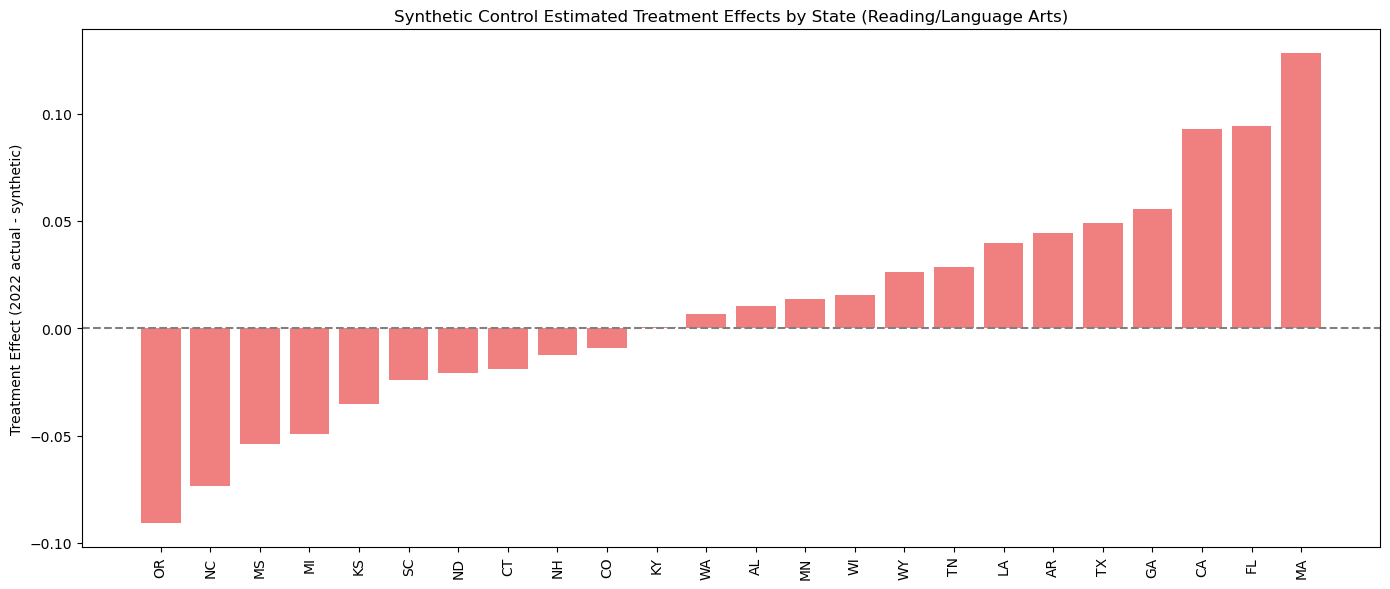

In [69]:
# calculate the avg score of RLA for each treatmented state
rla_state_avg = rla_df.groupby("stateabb")[["ys_mn19_ol", "ys_mn22_ol"]].mean().reset_index()

rla_effects = []
for state in rla_state_avg["stateabb"]:
    treated_row = rla_state_avg[rla_state_avg["stateabb"] == state].iloc[0]
    treated_2019 = treated_row["ys_mn19_ol"]
    treated_2022 = treated_row["ys_mn22_ol"]

    donor_pool = rla_state_avg[rla_state_avg["stateabb"] != state].copy()
    donor_pool["distance"] = (donor_pool["ys_mn19_ol"] - treated_2019).abs()

    top_donors = donor_pool.nsmallest(3, "distance")
    synth_2022 = top_donors["ys_mn22_ol"].mean()

    effect = treated_2022 - synth_2022
    rla_effects.append({"State": state, "Treatment_Effect": effect})

# Dataframe and sorting
rla_effects_df = pd.DataFrame(rla_effects).sort_values("Treatment_Effect")

# visualization
plt.figure(figsize=(14, 6))
plt.bar(rla_effects_df["State"], rla_effects_df["Treatment_Effect"], color="lightcoral")
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Treatment Effect (2022 actual - synthetic)")
plt.title("Synthetic Control Estimated Treatment Effects by State (Reading/Language Arts)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('SYM_rla')
plt.show()

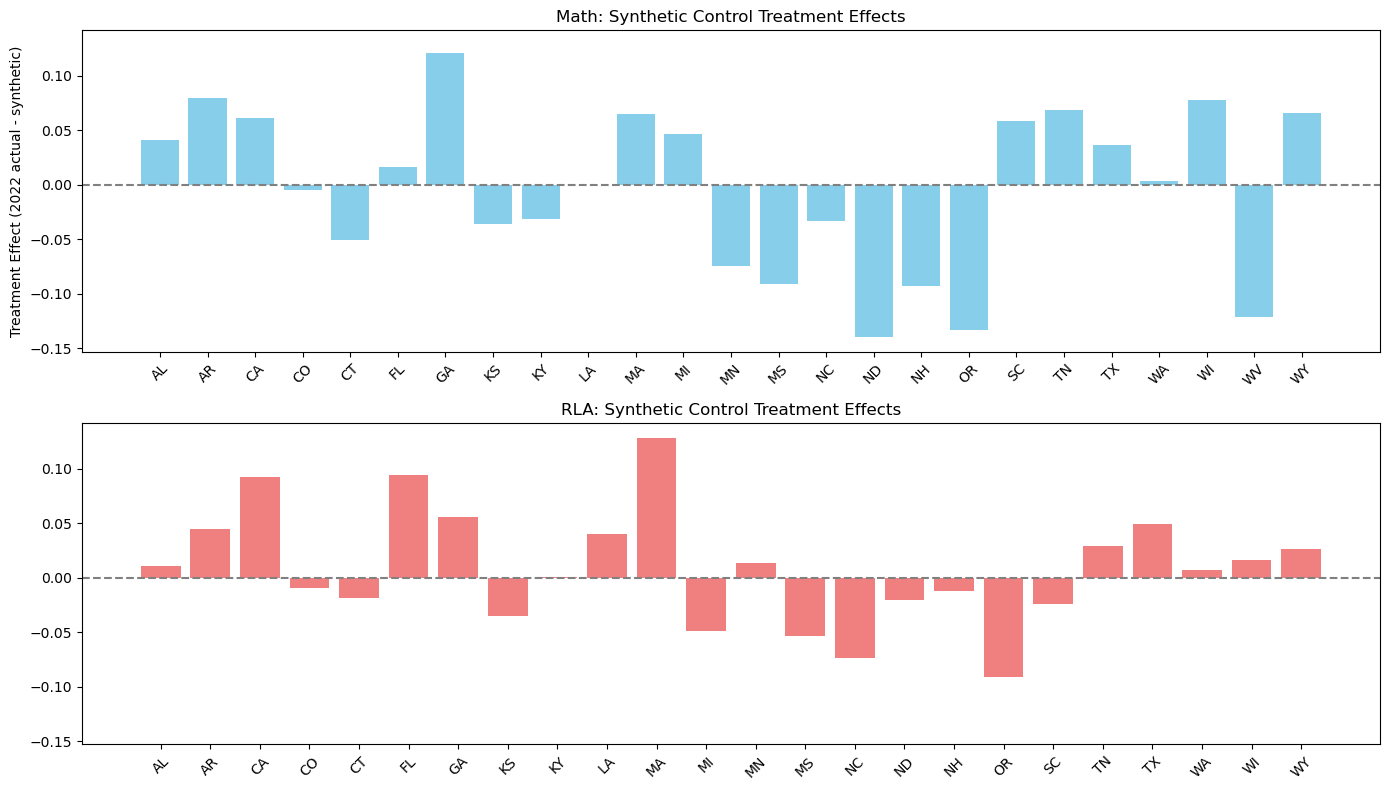

In [85]:
# Sort by state
synth_effects_df = pd.DataFrame(differences).sort_values("State")
rla_effects_df = pd.DataFrame(rla_effects).sort_values("State")

fig, axes = plt.subplots(2,1, figsize=(14, 8), sharey=True)

# --- Math subplot ---
axes[0].bar(synth_effects_df["State"], synth_effects_df["Treatment_Effect"], color="skyblue")
axes[0].axhline(0, color="gray", linestyle="--")
axes[0].set_ylabel("Treatment Effect (2022 actual - synthetic)")
axes[0].set_title("Math: Synthetic Control Treatment Effects")
axes[0].tick_params(axis='x', rotation=45)

# --- RLA subplot ---
axes[1].bar(rla_effects_df["State"], rla_effects_df["Treatment_Effect"], color="lightcoral")
axes[1].axhline(0, color="gray", linestyle="--")
axes[1].set_title("RLA: Synthetic Control Treatment Effects")
axes[1].tick_params(axis='x', rotation=45)

# Layout and save
plt.tight_layout()
plt.savefig('SYM_combined_bystate')
plt.show()